#ANHA4 Tracer Simulation Results

In [2]:
import sys
sys.path.insert(0, '_libs/')

In [3]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [4]:
def plot_map(nav_lon, nav_lat, Ba_mask, lev1, cmap, title, ax):
    proj=Basemap(projection='ortho',lon_0=-40, lat_0=40, resolution='l', ax=ax)
    proj.drawcoastlines(linewidth=1.5, linestyle='-', color='k', zorder=3)  
    proj.drawlsmask(land_color=[0.5, 0.5, 0.5], ocean_color='None', lsmask=None, zorder=2)
    x, y=proj(nav_lon, nav_lat)

    CS=proj.contourf(x, y, Ba_mask, lev1, cmap=cmap, extend='both')
    proj.contour(x, y, Ba_mask, lev1, linewidths=1.5, colors=('gray',))
    
    ax.set_title(title, fontsize=14)
    return CS

In [5]:
def plot_Arctic(nav_lon, nav_lat, var, lev, cmap, title, ax):
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')

    x, y=proj(nav_lon, nav_lat)

    CS=proj.contourf(x, y, var, lev, cmap=cmap, extend='both')
    proj.contour(x, y, var, lev, linewidths=0.5, colors=('gray',))
    ax.set_title(title, fontsize=14)
    return CS, proj

In [6]:
boundary_name=glob.glob('_data/Exchange/Ba_boundary_ANHA4.mat')
Boundary_Mat=scipy.io.loadmat(boundary_name[0])
#Ba_boundary=Boundary_Mat['Ba_boundary']
domain = Boundary_Mat['domain'].T

In [7]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ANHA4_Ba.mat')
Ba_ini_ANHA4 = MAT['Ba_ini_ANHA4']

In [9]:
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP01_5d_20100101_20100316_ptrc_T.nc')
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

In [17]:
L = 0
lev1 = range(40, 73, 3)
lev2 = [-14, -10, -6, -2, 2, 6, 10, 14]
lev3 = [-6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]
#lev4 = [49, 49.25, 49.5, 49.75, 50, 50.25, 50.5, 50.75, 51]

# Comparing river dilution

* Plan A: ```dilution = (source(:, :) - trb(:, :))*rnf(:, :)```
* Plan B: ```emp = emp + rnf```
* 6000 timepsteps

In [24]:
# Ba
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP01_5d_20100101_20100316_ptrc_T.nc')
Ba1 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob_Ba1 = ptrc_obj.variables['Ba'][:, 0, 600, 450]
Ob_d18O1 = ptrc_obj.variables['d18O'][:, 0, 600, 450]
# Ba
ptrc_obj = nc.Dataset('/ocean/yingkai/GEOTRACES/NEMO-CODE/NEMOGCM/CONFIG/ANHA4_OFF/EXP00/EXP02_5d_20100101_20100316_ptrc_T.nc')
Ba2 = ptrc_obj.variables['Ba'][-1, :, :, :]
Ob_Ba2 = ptrc_obj.variables['Ba'][:, 0, 600, 450]
Ob_d18O2 = ptrc_obj.variables['d18O'][:, 0, 600, 450]

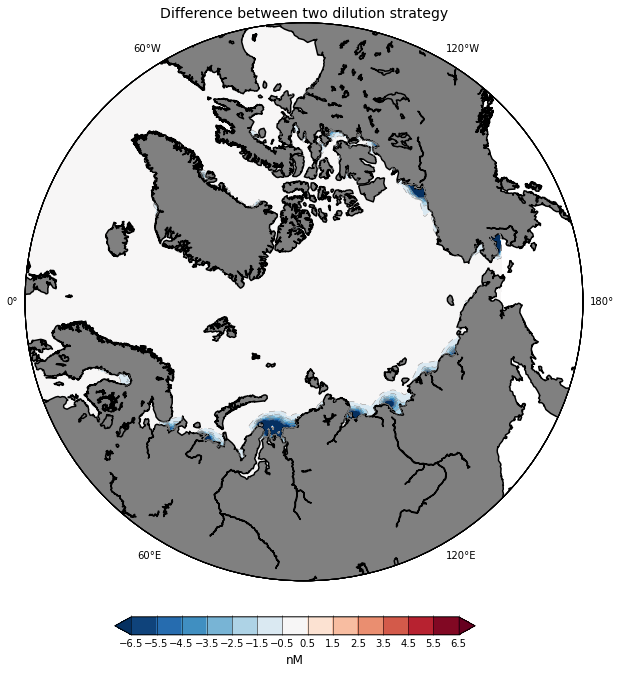

In [34]:
fig=plt.figure(figsize=(10, 10));
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=1.5, color='k')
x, y=proj(nav_lon, nav_lat)
CS=proj.contourf(x, y, Ba1[L, :, :]-Ba2[L, :, :], lev3, cmap=plt.cm.RdBu_r, extend='both')
proj.contour(x, y, Ba1[L, :, :]-Ba2[L, :, :], lev3, linewidths=0.5, colors=('gray',))
cax = fig.add_axes([0.25, 0.05, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('nM', fontsize=12)
CBar.ax.tick_params(axis='x', length=20)
CBar.set_ticks(lev3)
ax.set_title('Difference between two dilution strategy', fontsize=14)

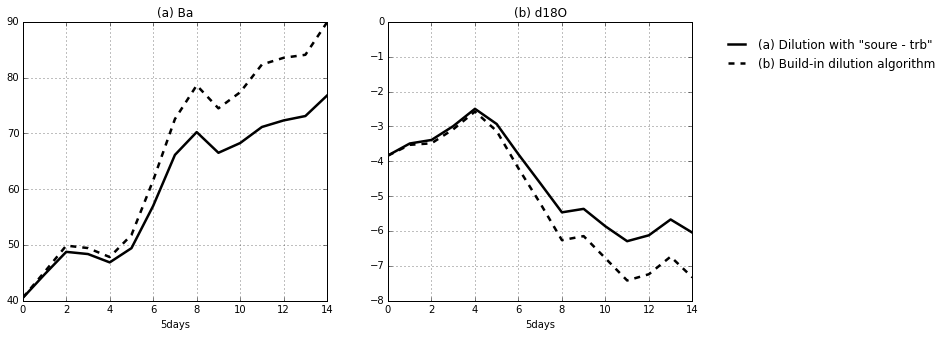

In [33]:
fig=plt.figure(figsize=(12, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
ax1.grid(); ax2.grid()

ax1.plot(Ob_Ba1, 'k-', linewidth=2.5, label='(a) Dilution with "soure - trb"')
ax1.plot(Ob_Ba2, 'k--', linewidth=2.5, label='(b) Build-in dilution algorithm')
ax1.set_ylim(40, 90); ax1.set_title('(a) Ba'); ax1.set_xlabel('5days')

ax2.plot(Ob_d18O1, 'k-', linewidth=2.5, label='(a) Dilution with "soure - trb"')
ax2.plot(Ob_d18O2, 'k--', linewidth=2.5, label='(b) Build-in dilution algorithm')
ax2.set_ylim(-8, 0); ax2.set_title('(b) d18O'); ax2.set_xlabel('5days')

LG=ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=1); LG.draw_frame(False) 

## d18O

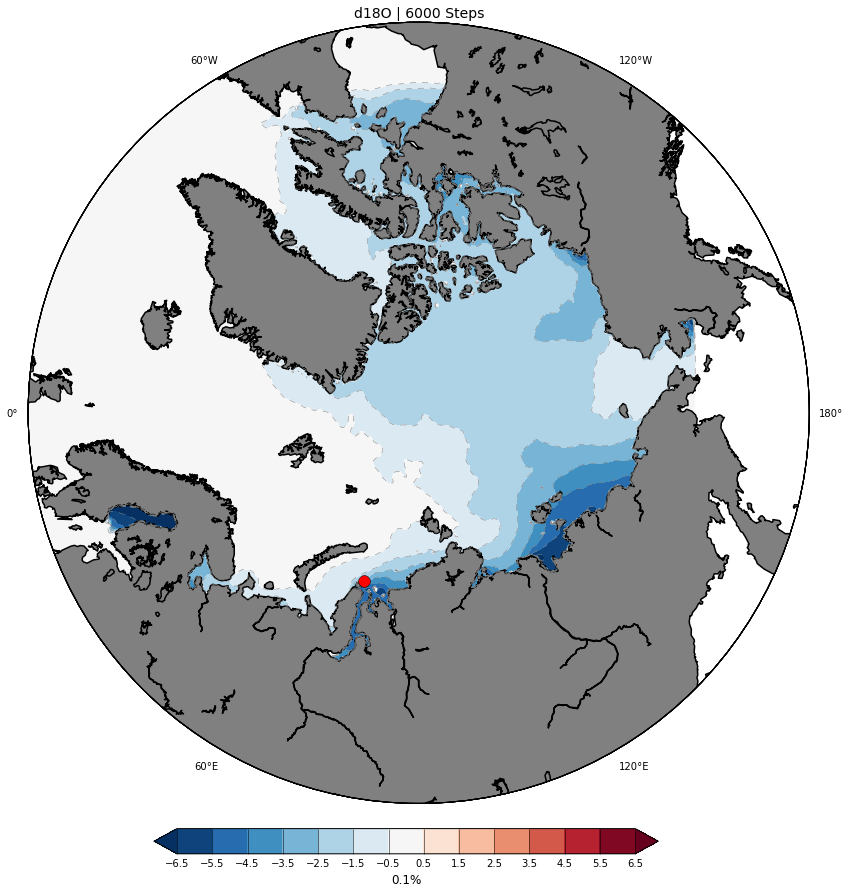

In [48]:
fig=plt.figure(figsize=(14, 14)); ax=plt.gca()

CS, proj = plot_Arctic(nav_lon, nav_lat, d18O[L, :, :], lev3, plt.cm.RdBu_r, 'd18O | 6000 Steps', ax)

x, y=proj(nav_lon, nav_lat)
proj.plot(x[600, 450], y[600, 450], 'ro', ms=12)

cax = fig.add_axes([0.25, 0.075, 0.5, 0.025])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('0.1%', fontsize=12)
CBar.ax.tick_params(axis='x', length=25)
CBar.set_ticks(lev3)

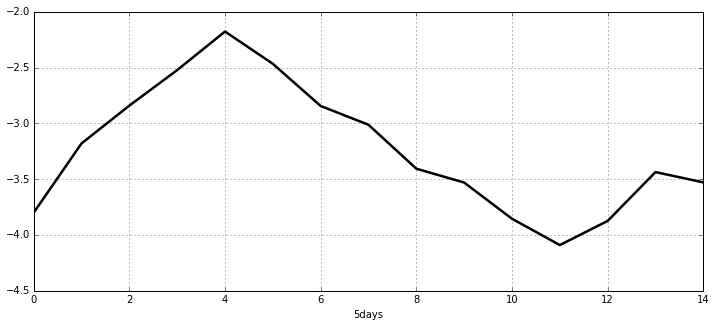

In [29]:
fig=plt.figure(figsize=(12, 5)); ax=plt.gca()
ax.plot(Ob_d18O, 'k-', linewidth=2.5); ax.grid()
ax.set_xlabel('5days')